# Exploratory Data Analysis

#### What is the problem we are trying to solve?  
Develop a medical question-answering system utilizing the provided dataset containing medical  information.  
The goal is to create a model that can effectively answer user queries related to  medical diseases. You are free to augment the provided dataset with other medical datasets if  you feel it is necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import string

## Let's load our dataset  

In [2]:
abs_path = os.path.abspath('../../')
path_to_data = 'data/raw/'
filename = 'intern_screening_dataset.csv'

In [3]:
# load our dataset
raw_dataset = pd.read_csv(os.path.join(abs_path, path_to_data, filename))

In [4]:
# how does the 10 first samples look like?
raw_dataset.head(10)

,question,answer
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...
1,What is (are) Glaucoma ?,The optic nerve is a bundle of more than 1 mil...
2,What is (are) Glaucoma ?,Open-angle glaucoma is the most common form of...
3,Who is at risk for Glaucoma? ?,Anyone can develop glaucoma. Some people are a...
4,How to prevent Glaucoma ?,"At this time, we do not know how to prevent gl..."
5,What are the symptoms of Glaucoma ?,"At first, open-angle glaucoma has no symptoms...."
6,What are the treatments for Glaucoma ?,"Yes. Immediate treatment for early stage, open..."
7,what research (or clinical trials) is being do...,Through studies in the laboratory and with pat...
8,Who is at risk for Glaucoma? ?,Encourage them to have a comprehensive dilated...
9,What is (are) Glaucoma ?,National Eye Institute National Institutes of...


In [5]:
augmented_dataset = pd.read_csv(os.path.join(abs_path, path_to_data, 'augmented_intern_screening_dataset.csv'))
augmented_dataset

,question,answer,processed_question,processed_answer,num_words_in_question,num_words_in_answer,distances,kwords
0,What is (are) Glaucoma?,Glaucoma is a group of diseases that can damag...,what is are glaucoma,glaucoma is a group of diseases that can damag...,4,111,0.722222,glaucoma
1,What is (are) Glaucoma?,The optic nerve is a bundle of more than 1 mil...,what is are glaucoma,the optic nerve is a bundle of more than 1 mil...,4,20,0.733333,glaucoma
2,What is (are) Glaucoma?,Open-angle glaucoma is the most common form of...,what is are glaucoma,openangle glaucoma is the most common form of ...,4,86,0.761905,glaucoma
3,Who is at risk for Glaucoma??,Anyone can develop glaucoma. Some people are a...,who is at risk for glaucoma,anyone can develop glaucoma some people are at...,6,78,0.773585,risk glaucoma
4,How to prevent Glaucoma?,"At this time, we do not know how to prevent gl...",how to prevent glaucoma,at this time we do not know how to prevent gla...,4,84,0.814815,prevent glaucoma
...,...,...,...,...,...,...,...,...
16343,What is (are) Diabetic Neuropathies: The Nerve...,Autonomic neuropathy affects the nerves that c...,what is are diabetic neuropathies the nerve da...,autonomic neuropathy affects the nerves that c...,10,492,0.733333,nerve neuropathies diabetes damage diabetic
16344,What is (are) Diabetic Neuropathies: The Nerve...,"Proximal neuropathy, sometimes called lumbosac...",what is are diabetic neuropathies the nerve da...,proximal neuropathy sometimes called lumbosacr...,10,91,0.704348,nerve neuropathies diabetes damage diabetic
16345,What is (are) Diabetic Neuropathies: The Nerve...,Focal neuropathy appears suddenly and affects ...,what is are diabetic neuropathies the nerve da...,focal neuropathy appears suddenly and affects ...,10,179,0.726190,nerve neuropathies diabetes damage diabetic
16346,How to prevent Diabetic Neuropathies: The Nerv...,The best way to prevent neuropathy is to keep ...,how to prevent diabetic neuropathies the nerve...,the best way to prevent neuropathy is to keep ...,10,30,0.681159,prevent nerve neuropathies diabetes damage dia...


In [6]:
# check # of samples in the dataset
print(f"There are {raw_dataset.shape[0]:,.0f} samples in this dataset.")

There are 16,406 samples in this dataset.


In [7]:
# check general description of the dataset
# there are some null values
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16406 entries, 0 to 16405
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  16406 non-null  object
 1   answer    16401 non-null  object
dtypes: object(2)
memory usage: 256.5+ KB


In [8]:
# are there any duplicate examples?
print(f"There are {raw_dataset.shape[0]-raw_dataset.drop_duplicates().shape[0]:,.0f} duplicate samples")

There are 48 duplicate samples


In [9]:
# let's drop the duplicate ones, they could mislead some metrics
raw_dataset = raw_dataset.drop_duplicates()
print("Number of samples after removing duplicate ones:")
print(f"{raw_dataset.shape[0]:,.0f}")

Number of samples after removing duplicate ones:
16,358


In [10]:
# let's check for null values in the dataset
print(f"# of null values for questions {raw_dataset.isnull()['question'].value_counts()}")
print()
print(f"# of null values for answers {raw_dataset.isnull()['answer'].value_counts()}")
print()
# There are 5 null values for answer. So let's remove them

# of null values for questions question
False    16358
Name: count, dtype: int64

# of null values for answers answer
False    16353
True         5
Name: count, dtype: int64



In [11]:
# remove samples that have null values for the answer column
raw_dataset = raw_dataset.dropna(subset=['answer'])
raw_dataset.shape

(16353, 2)

In [12]:
# reformat the question by replacing _? by ? without space
raw_dataset['question'] = raw_dataset['question'].map(lambda x: x.replace(' ?', '?'))

In [13]:
# are there cases where the question is the same as the answer? We don't want those examples
raw_dataset[raw_dataset['question'].map(lambda x: ''.join([c for c in x if x not in string.punctuation])).values == raw_dataset['answer'].map(lambda x: ''.join([c for c in x if x not in string.punctuation])).values]

,question,answer
2555,What are the symptoms of Bell's palsy?,What are the symptoms of Bell's palsy?
2556,What causes Bell's palsy?,What causes Bell's palsy?
3124,Is Wolff-Parkinson-White syndrome inherited?,Is Wolff-Parkinson-White syndrome inherited?
3135,Is Williams syndrome inherited?,Is Williams syndrome inherited?


In [14]:
# Let's remove those
raw_dataset = raw_dataset.drop(index=[2555,2556,3124,3135])

In [15]:
# remove leading lines and extra white space from the answer
# remove punctuation, just to check whether there are duplicated questions or answers
raw_dataset['processed_question'] = raw_dataset['question'].map(lambda x: ' '.join(x.split()).lower())
raw_dataset['processed_answer'] = raw_dataset['answer'].map(lambda x: ' '.join(x.split()).lower())
raw_dataset['processed_question'] = raw_dataset['processed_question'].map(lambda x: ''.join([c for c in x if c not in string.punctuation]))
raw_dataset['processed_answer'] = raw_dataset['processed_answer'].map(lambda x: ''.join([c for c in x if c not in string.punctuation]))


In [16]:
raw_dataset.shape

(16349, 4)

In [17]:
# are there duplicated questions? or answers?
print(f"There are {raw_dataset.shape[0]-np.unique(raw_dataset['question']).shape[0]} duplicated questions")
print(f"There are {raw_dataset.shape[0]-np.unique(raw_dataset['answer']).shape[0]} duplicated answers")

There are 1375 duplicated questions
There are 542 duplicated answers


In [18]:
print(raw_dataset[raw_dataset.duplicated(subset=['answer'])].head(20)['question'].values[0])
print(raw_dataset[raw_dataset.duplicated(subset=['answer'])].head(20)['answer'].values[0])

what research (or clinical trials) is being done for Uterine Sarcoma?
New types of treatment are being tested in clinical trials.
                    Information about clinical trials is available from the NCI website.
                
                
                    Patients may want to think about taking part in a clinical trial.
                    For some patients, taking part in a clinical trial may be the best treatment choice. Clinical trials are part of the cancer research process. Clinical trials are done to find out if new cancer treatments are safe and effective or better than the standard treatment.   Many of today's standard treatments for cancer are based on earlier clinical trials. Patients who take part in a clinical trial may receive the standard treatment or be among the first to receive a new treatment.   Patients who take part in clinical trials also help improve the way cancer will be treated in the future. Even when clinical trials do not lead to effective n

In [19]:
' '.join(raw_dataset[raw_dataset.duplicated(subset=['answer'])].head(20)['answer'].values[0].split())

"New types of treatment are being tested in clinical trials. Information about clinical trials is available from the NCI website. Patients may want to think about taking part in a clinical trial. For some patients, taking part in a clinical trial may be the best treatment choice. Clinical trials are part of the cancer research process. Clinical trials are done to find out if new cancer treatments are safe and effective or better than the standard treatment. Many of today's standard treatments for cancer are based on earlier clinical trials. Patients who take part in a clinical trial may receive the standard treatment or be among the first to receive a new treatment. Patients who take part in clinical trials also help improve the way cancer will be treated in the future. Even when clinical trials do not lead to effective new treatments, they often answer important questions and help move research forward. Patients can enter clinical trials before, during, or after starting their cancer 

Let's pick up random examples so we can understand the structure of the questions and answers in the dataset


In [20]:
# frac set to a number to approximate 50 samples
random_samples = raw_dataset.sample(frac=0.003, random_state=42)
print(f"# of random samples: {random_samples.shape[0]}")

# of random samples: 49


In [22]:
# Display questions and answers
for index, question, answer, _, _ in random_samples.itertuples():
    print(index)
    print(question)
    print(answer)
    print()

387
What are the symptoms of Breast Cancer?
When breast cancer first develops, there may be no symptoms at all. But as the cancer grows, it can cause changes that women should watch for. You can help safeguard your health by learning the following warning signs of breast cancer. -  a lump or thickening in or near the breast or in the underarm area  - a change in the size or shape of the breast  - a dimple or puckering in the skin of the breast  -  a nipple turned inward into the breast  -  fluid, other than breast milk, from the nipple, especially if it's bloody  - scaly, red, or swollen skin on the breast, nipple, or areola (the dark area of skin around the nipple)  - dimples in the breast that look like the skin of an orange. a lump or thickening in or near the breast or in the underarm area a change in the size or shape of the breast a dimple or puckering in the skin of the breast a nipple turned inward into the breast fluid, other than breast milk, from the nipple, especially if it

In [23]:
# Let's count in average how many words are there in every answer
raw_dataset['num_words_in_question'] = raw_dataset['processed_question'].map(lambda answer: len(answer.split()))
raw_dataset['num_words_in_answer'] = raw_dataset['processed_answer'].map(lambda answer: len(answer.split()))

In [25]:
raw_dataset.head(5)

,question,answer,processed_question,processed_answer,num_words_in_question,num_words_in_answer
0,What is (are) Glaucoma?,Glaucoma is a group of diseases that can damag...,what is are glaucoma,glaucoma is a group of diseases that can damag...,4,111
1,What is (are) Glaucoma?,The optic nerve is a bundle of more than 1 mil...,what is are glaucoma,the optic nerve is a bundle of more than 1 mil...,4,20
2,What is (are) Glaucoma?,Open-angle glaucoma is the most common form of...,what is are glaucoma,openangle glaucoma is the most common form of ...,4,86
3,Who is at risk for Glaucoma??,Anyone can develop glaucoma. Some people are a...,who is at risk for glaucoma,anyone can develop glaucoma some people are at...,6,78
4,How to prevent Glaucoma?,"At this time, we do not know how to prevent gl...",how to prevent glaucoma,at this time we do not know how to prevent gla...,4,84


In [27]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16349 entries, 0 to 16405
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   question               16349 non-null  object
 1   answer                 16349 non-null  object
 2   processed_question     16349 non-null  object
 3   processed_answer       16349 non-null  object
 4   num_words_in_question  16349 non-null  int64 
 5   num_words_in_answer    16349 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 894.1+ KB


In [26]:
raw_dataset.describe()

,num_words_in_question,num_words_in_answer
count,16349.000000,16349.000000
mean,7.224234,196.625237
std,2.367816,242.038099
min,3.000000,1.000000
25%,5.000000,68.000000
50%,7.000000,136.000000
75%,9.000000,248.000000
max,26.000000,4188.000000


<Axes: >

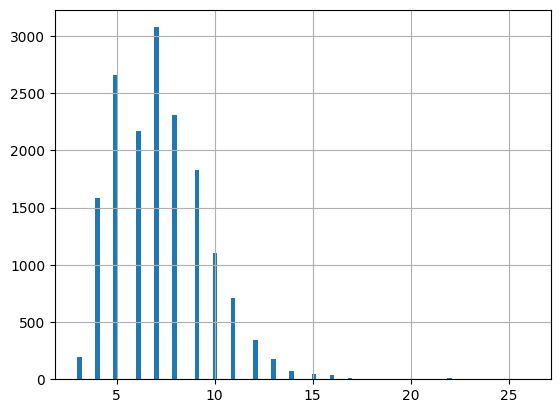

In [52]:
# let's plot an histogram of the number of words in questions so we ca visualize the distribution
raw_dataset['num_words_in_question'].hist(bins= 100)

<Axes: >

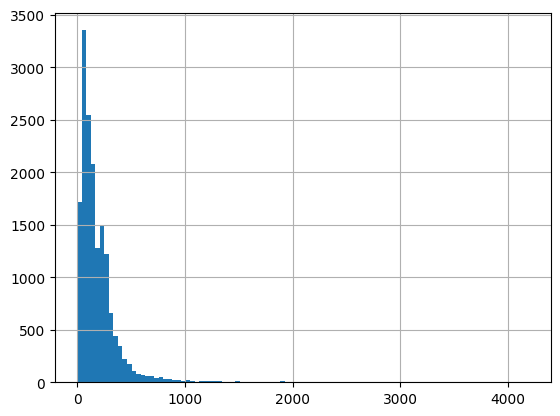

In [56]:
# let's plot an histogram of the number of words in answers so we ca visualize the distribution
raw_dataset['num_words_in_answer'].hist(bins= 100)

In [28]:
## it looks like there are some outliers in the answers, regarding the number of words it does have

### Let's find wether there are some questions to which the answer is the same question or something very similar.
Usually this appears at the begginning of the answer, we can calculate a similarity between the first sentences of an answer and the question.  
Let's use edit_distance for this

In [57]:
from nltk.metrics import edit_distance

In [58]:
def calculate_edit_distance_between_question_and_answer(questions:list[str], answers:list[str]):
    distances = []
    margin = 3
    for q,a in zip(questions, answers):
        q_length = len(q.split(' '))
        # extract the first portion of the answer
        a = ' '.join(a.split(' ')[:q_length+margin])
        distance = edit_distance(q,a)
        distance = distance/max(len(q), len(a))
        distances.append(distance)
    return distances

In [59]:
raw_dataset['distances'] = calculate_edit_distance_between_question_and_answer(raw_dataset['processed_question'].tolist(), raw_dataset['processed_answer'].tolist())

In [61]:
# assumption is that very low distances indicates that the question appears at the beginning (or is equal) to the question
raw_dataset[raw_dataset['distances']<0.15]

,question,answer,processed_question,processed_answer,num_words_in_question,num_words_in_answer,distances
2477,"What are the symptoms of Natal teeth, intestin...",What are the signs and symptoms of Natal teeth...,what are the symptoms of natal teeth intestina...,what are the signs and symptoms of natal teeth...,12,262,0.144330
2482,What are the symptoms of Ventricular extrasyst...,What are the signs and symptoms of Ventricular...,what are the symptoms of ventricular extrasyst...,what are the signs and symptoms of ventricular...,13,314,0.120690
2516,"What are the symptoms of Symphalangism, distal...",What are the signs and symptoms of Symphalangi...,what are the symptoms of symphalangism distal ...,what are the signs and symptoms of symphalangi...,16,294,0.113821
2618,"What are the symptoms of Mental retardation, m...",What are the signs and symptoms of Mental reta...,what are the symptoms of mental retardation ma...,what are the signs and symptoms of mental reta...,13,272,0.123894
2685,What are the symptoms of Mastocytosis cutaneou...,What are the signs and symptoms of Mastocytosi...,what are the symptoms of mastocytosis cutaneou...,what are the signs and symptoms of mastocytosi...,15,347,0.119658
...,...,...,...,...,...,...,...
7548,What are the symptoms of Microcephalic osteody...,What are the signs and symptoms of Microcephal...,what are the symptoms of microcephalic osteody...,what are the signs and symptoms of microcephal...,11,492,0.147368
7671,What are the symptoms of Bifid nose with or wi...,What are the signs and symptoms of Bifid nose ...,what are the symptoms of bifid nose with or wi...,what are the signs and symptoms of bifid nose ...,14,255,0.147368
7730,What are the symptoms of Familial encephalopat...,What are the signs and symptoms of Familial en...,what are the symptoms of familial encephalopat...,what are the signs and symptoms of familial en...,11,258,0.145833
7805,"What are the symptoms of Arthrogryposis, dista...",What are the signs and symptoms of Arthrogrypo...,what are the symptoms of arthrogryposis distal...,what are the signs and symptoms of arthrogrypo...,14,259,0.111111


In [66]:
## there were also situations where the answer was just wrong, like for example, frequently asked questions phrase and that was all
raw_dataset[raw_dataset['processed_answer'].map(lambda x: 'faq' in x) & raw_dataset['num_words_in_answer'].map(lambda x: x<10)]

,question,answer,processed_question,processed_answer,num_words_in_question,num_words_in_answer,distances
7923,What is (are) Parasites - Toxocariasis (also k...,Frequently Asked Questions (FAQs)\n \n \...,what is are parasites toxocariasis also known...,frequently asked questions faqs fact sheets,10,6,0.797101
8001,What is (are) Parasites - African Trypanosomia...,Frequently Asked Queestions (FAQs),what is are parasites african trypanosomiasis...,frequently asked queestions faqs,11,4,0.807692
8041,What is (are) Parasites - Paragonimiasis (also...,Frequently Asked Queestions (FAQs),what is are parasites paragonimiasis also kno...,frequently asked queestions faqs,10,4,0.808219
8052,What is (are) Parasites - Lymphatic Filariasis?,Frequently Asked Questions (FAQs)\n \n V...,what is are parasites lymphatic filariasis,frequently asked questions faqs vector informa...,6,6,0.760000


In [72]:
## also in some situations the questions fell out of the distribution of the dataset, specially those with more words than the average.
## for example:
## some of them were formulated incorrectly like:
"""
What is (are) Am I at Risk for Type 2 Diabetes? 
'Who is at risk for Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes??',
'What to do for Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes?',
'What is (are) I Can Lower My Risk for Type 2 Diabetes: A Guide for American Indians?',
"""
raw_dataset[raw_dataset['num_words_in_question']>20]['question'].values

array(['What are the symptoms of Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes?',
       'Who is at risk for Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes??',
       'Who is at risk for Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes??',
       'Who is at risk for Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes??',
       'What to do for Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes?',
       'What are the treatments for National Hormone and Pituitary Program (NHPP): Information for People Treated with Pituitary Human Growth Hormone (Comprehensive Report)?',
       'What are the treatments for National Hormone and Pituitary Program (NHPP): Information for People Treated with Pituitary Human Growth Hormone (Comprehensive Report)?',
       'What are the treatments for National Hormone and Pituit

### Can we extract key words removing stop words from the questions? So we can find categories to which the questions belong? 

In [31]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [74]:
def remove_stop_words_from_questions_and_return_unique_words(questions:list[str]):
    kwords = []
    stop_words = set(stopwords.words('english'))
    for q in questions:
        q_tokens = word_tokenize(q)
        q_tokens = [t for t in q_tokens if t not in stop_words]
        q_tokens = list(set(q_tokens))
        kwords.append(' '.join(q_tokens))
    return kwords

In [75]:
raw_dataset['kwords'] = remove_stop_words_from_questions_and_return_unique_words(raw_dataset['processed_question'].tolist())

In [76]:
raw_dataset

,question,answer,processed_question,processed_answer,num_words_in_question,num_words_in_answer,distances,kwords
0,What is (are) Glaucoma?,Glaucoma is a group of diseases that can damag...,what is are glaucoma,glaucoma is a group of diseases that can damag...,4,111,0.722222,glaucoma
1,What is (are) Glaucoma?,The optic nerve is a bundle of more than 1 mil...,what is are glaucoma,the optic nerve is a bundle of more than 1 mil...,4,20,0.733333,glaucoma
2,What is (are) Glaucoma?,Open-angle glaucoma is the most common form of...,what is are glaucoma,openangle glaucoma is the most common form of ...,4,86,0.761905,glaucoma
3,Who is at risk for Glaucoma??,Anyone can develop glaucoma. Some people are a...,who is at risk for glaucoma,anyone can develop glaucoma some people are at...,6,78,0.773585,risk glaucoma
4,How to prevent Glaucoma?,"At this time, we do not know how to prevent gl...",how to prevent glaucoma,at this time we do not know how to prevent gla...,4,84,0.814815,prevent glaucoma
...,...,...,...,...,...,...,...,...
16401,What is (are) Diabetic Neuropathies: The Nerve...,Autonomic neuropathy affects the nerves that c...,what is are diabetic neuropathies the nerve da...,autonomic neuropathy affects the nerves that c...,10,492,0.733333,damage neuropathies nerve diabetes diabetic
16402,What is (are) Diabetic Neuropathies: The Nerve...,"Proximal neuropathy, sometimes called lumbosac...",what is are diabetic neuropathies the nerve da...,proximal neuropathy sometimes called lumbosacr...,10,91,0.704348,damage neuropathies nerve diabetes diabetic
16403,What is (are) Diabetic Neuropathies: The Nerve...,Focal neuropathy appears suddenly and affects ...,what is are diabetic neuropathies the nerve da...,focal neuropathy appears suddenly and affects ...,10,179,0.726190,damage neuropathies nerve diabetes diabetic
16404,How to prevent Diabetic Neuropathies: The Nerv...,The best way to prevent neuropathy is to keep ...,how to prevent diabetic neuropathies the nerve...,the best way to prevent neuropathy is to keep ...,10,30,0.681159,prevent damage neuropathies nerve diabetes dia...


### Plot some WordCloud to theck if we can visualize some important topics 

In [30]:
# download some data for nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alditus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/alditus/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
def calculate_frequent_distribution(sentences: list[str]):
    tokens = word_tokenize(' '.join(sentences))
    # remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop_words]
    freqdist = FreqDist(tokens)
    return freqdist

def plot_word_cloud(frequencies:dict):
    wcloud = WordCloud(background_color='white').generate_from_frequencies(frequencies)
    plt.figure(figsize=(10, 5))
    plt.imshow(wcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

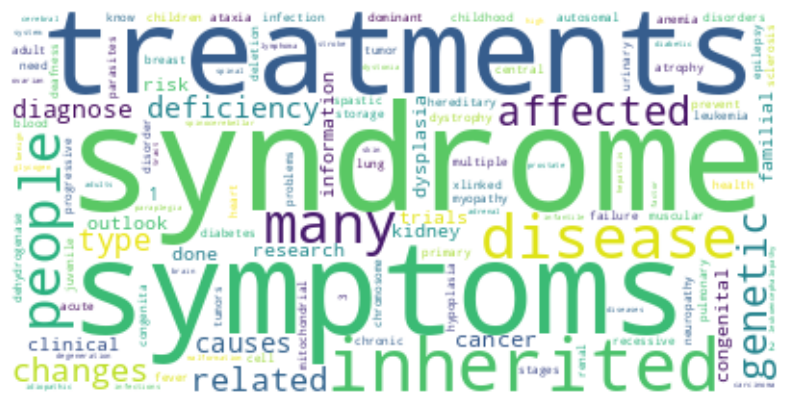

In [41]:
freqdist = calculate_frequent_distribution(raw_dataset['processed_question'].tolist())
plot_word_cloud(freqdist)

In [ ]:
# it looks like prorably there are many questions asking for treatments, symptoms, but there is less of specific diseases that could be our key words
# let's plot a wordcloud but taking into account less popular terms
freqdist.most_common(30)

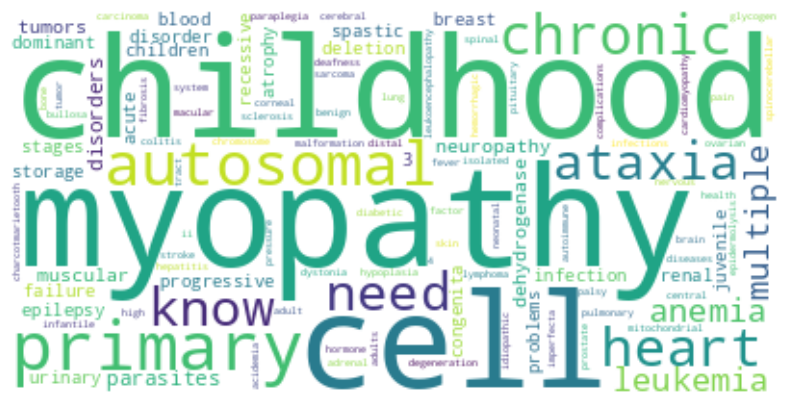

In [50]:
plot_word_cloud({k:v for k,v in sorted([(x,y) for x,y in freqdist.items() if y<200], key=lambda x: x[1])})

## Is it possible to cluster questions based on key words?

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [105]:
## before that, let's check if we have questions with no key words, those are bad formatted questions
raw_dataset[raw_dataset['kwords'].map(lambda x: len(x.split())==0)]

,question,answer,processed_question,processed_answer,num_words_in_question,num_words_in_answer,distances,kwords,kmean_labels
7881,What is (are) ?,On this Page General Information What is vanco...,what is are,on this page general information what is vanco...,3,680,0.825000,,261
8073,What is (are) ?,On this Page General Information about VISA/VR...,what is are,on this page general information about visavrs...,3,826,0.851064,,261


In [106]:
## let's remove them
raw_dataset = raw_dataset.drop(index=[7881,8073]).reset_index(drop=True)

### Ok, now we are ready to compute clusters

In [108]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_representations = tfidf_vectorizer.fit_transform(raw_dataset['kwords'])

In [109]:
tfidf_representations.shape

(16347, 4651)

In [110]:
## since we do not know the number of clusters we want, let's approximate it
## let's say we have 25 questions per topic
## so we want num_of_examples/25 clusters
print(f"We want approx {(raw_dataset.shape[0]/25):,.0f} clusters")

We want approx 654 clusters


In [111]:
kmean_clusterer = KMeans(n_clusters=650, random_state=42, n_init='auto')
kmean_clusterer.fit(tfidf_representations)

KMeans(n_clusters=650, random_state=42)

In [112]:
raw_dataset['kmean_labels'] = kmean_clusterer.labels_

In [113]:
raw_dataset.head(10)

,question,answer,processed_question,processed_answer,num_words_in_question,num_words_in_answer,distances,kwords,kmean_labels
0,What is (are) Glaucoma?,Glaucoma is a group of diseases that can damag...,what is are glaucoma,glaucoma is a group of diseases that can damag...,4,111,0.722222,glaucoma,326
1,What is (are) Glaucoma?,The optic nerve is a bundle of more than 1 mil...,what is are glaucoma,the optic nerve is a bundle of more than 1 mil...,4,20,0.733333,glaucoma,326
2,What is (are) Glaucoma?,Open-angle glaucoma is the most common form of...,what is are glaucoma,openangle glaucoma is the most common form of ...,4,86,0.761905,glaucoma,326
3,Who is at risk for Glaucoma??,Anyone can develop glaucoma. Some people are a...,who is at risk for glaucoma,anyone can develop glaucoma some people are at...,6,78,0.773585,risk glaucoma,326
4,How to prevent Glaucoma?,"At this time, we do not know how to prevent gl...",how to prevent glaucoma,at this time we do not know how to prevent gla...,4,84,0.814815,prevent glaucoma,326
5,What are the symptoms of Glaucoma?,"At first, open-angle glaucoma has no symptoms....",what are the symptoms of glaucoma,at first openangle glaucoma has no symptoms it...,6,45,0.679245,symptoms glaucoma,326
6,What are the treatments for Glaucoma?,"Yes. Immediate treatment for early stage, open...",what are the treatments for glaucoma,yes immediate treatment for early stage openan...,6,52,0.612903,treatments glaucoma,326
7,what research (or clinical trials) is being do...,Through studies in the laboratory and with pat...,what research or clinical trials is being done...,through studies in the laboratory and with pat...,10,72,0.753086,trials glaucoma research done clinical,444
8,Who is at risk for Glaucoma??,Encourage them to have a comprehensive dilated...,who is at risk for glaucoma,encourage them to have a comprehensive dilated...,6,40,0.800000,risk glaucoma,326
9,What is (are) Glaucoma?,National Eye Institute National Institutes of...,what is are glaucoma,national eye institute national institutes of ...,4,43,0.807692,glaucoma,326


In [115]:
raw_dataset[raw_dataset['kmean_labels']==444]

,question,answer,processed_question,processed_answer,num_words_in_question,num_words_in_answer,distances,kwords,kmean_labels
7,what research (or clinical trials) is being do...,Through studies in the laboratory and with pat...,what research or clinical trials is being done...,through studies in the laboratory and with pat...,10,72,0.753086,trials glaucoma research done clinical,444
211,what research (or clinical trials) is being do...,Scientists are pursuing a wide range of basic ...,what research or clinical trials is being done...,scientists are pursuing a wide range of basic ...,10,154,0.634146,trials osteoporosis research done clinical,444
272,what research (or clinical trials) is being do...,Scientists are making rapid progress in unders...,what research or clinical trials is being done...,scientists are making rapid progress in unders...,11,246,0.611650,trials rheumatoid research done clinical arthr...,444
355,what research (or clinical trials) is being do...,Treating Older Adults Studies show that the ma...,what research or clinical trials is being done...,treating older adults studies show that the ma...,10,939,0.678571,trials depression research done clinical,444
451,what research (or clinical trials) is being do...,Researchers are conducting clinical trials in ...,what research or clinical trials is being done...,researchers are conducting clinical trials in ...,10,401,0.597701,trials leukemia research done clinical,444
...,...,...,...,...,...,...,...,...,...
9754,what research (or clinical trials) is being do...,The National Institute of Neurological Disorde...,what research or clinical trials is being done...,the national institute of neurological disorde...,11,113,0.714286,trials transverse research myelitis done clinical,444
9758,what research (or clinical trials) is being do...,The NINDS supports research on disorders that ...,what research or clinical trials is being done...,the ninds supports research on disorders that ...,11,36,0.510638,trials lethargica research done clinical encep...,444
9762,what research (or clinical trials) is being do...,The National Institute of Neurological Disorde...,what research or clinical trials is being done...,the national institute of neurological disorde...,10,151,0.702128,trials dystonias research done clinical,444
9766,what research (or clinical trials) is being do...,The mission of the National Institute of Neuro...,what research or clinical trials is being done...,the mission of the national institute of neuro...,11,110,0.720930,trials syndrome dandywalker research done clin...,444


### Since we do not know the actual number of clusters, let's try another algorithm that do not need the exact number of clusters, that way we could get some approximation of the number of clusters we need

In [103]:
from sklearn.cluster import AgglomerativeClustering

In [117]:
# n_clusters = None since we want the algorithm to decide
# metric = 'cosine', it usually works well on nlp tasks
# compute_full_tree = True
# linkage = average
# distance_threshold = 0.5
agglomerative_clustering = AgglomerativeClustering(n_clusters=None, metric='cosine', compute_full_tree=True, linkage='average', distance_threshold=0.5)
agglomerative_clustering.fit(tfidf_representations.toarray())

AgglomerativeClustering(compute_full_tree=True, distance_threshold=0.5,
                        linkage='average', metric='cosine', n_clusters=None)

In [118]:
raw_dataset['agglomerative_labels'] = agglomerative_clustering.labels_

In [121]:
np.unique(agglomerative_clustering.labels_).shape

(3368,)

In [136]:
raw_dataset[raw_dataset['agglomerative_labels']==513]

,question,answer,processed_question,processed_answer,num_words_in_question,num_words_in_answer,distances,kwords,kmean_labels,agglomerative_labels,kmean_labels_n_3000
1662,What is (are) Kidney Failure?,Healthy kidneys clean your blood by removing e...,what is are kidney failure,healthy kidneys clean your blood by removing e...,5,149,0.745098,kidney failure,220,513,2301
16023,What to do for Kidney Failure: What to Expect?,For people who are on dialysis or approaching ...,what to do for kidney failure what to expect,for people who are on dialysis or approaching ...,9,221,0.720000,kidney failure expect,220,513,2301
16024,What to do for Kidney Failure: What to Expect?,- Kidney failure can affect a persons health i...,what to do for kidney failure what to expect,kidney failure can affect a persons health in...,9,308,0.800000,kidney failure expect,220,513,2301


In [138]:
raw_dataset[raw_dataset['kmean_labels_n_3000']==2864]

,question,answer,processed_question,processed_answer,num_words_in_question,num_words_in_answer,distances,kwords,kmean_labels,agglomerative_labels,kmean_labels_n_3000
1901,What is (are) Kaposi's Sarcoma?,Kaposi's sarcoma is a cancer that causes patch...,what is are kaposis sarcoma,kaposis sarcoma is a cancer that causes patche...,5,128,0.702128,kaposis sarcoma,82,2521,2864
5637,What are the symptoms of Cerebral sarcoma?,What are the signs and symptoms of Cerebral sa...,what are the symptoms of cerebral sarcoma,what are the signs and symptoms of cerebral sa...,7,227,0.254545,sarcoma symptoms cerebral,82,3000,2864
6819,What is (are) Epithelioid sarcoma?,Epithelioid sarcoma is a rare cancer that most...,what is are epithelioid sarcoma,epithelioid sarcoma is a rare cancer that most...,5,154,0.782609,sarcoma epithelioid,82,2516,2864


### Let's calculate the kmeans but with relatively the same number of clusters returned by aglomerative clustering

In [130]:
kmean_clusterer = KMeans(n_clusters=3000, random_state=42, n_init='auto')
kmean_clusterer.fit(tfidf_representations)

KMeans(n_clusters=3000, random_state=42)

In [131]:
raw_dataset['kmean_labels_n_3000'] = kmean_clusterer.labels_

### One last experiment with clustering, let's try DBSCAN algorithm

In [139]:
from sklearn.cluster import DBSCAN

In [174]:
dbscan_clusterer = DBSCAN(eps=0.25, min_samples=2, metric='cosine')
dbscan_clusterer.fit(tfidf_representations)

DBSCAN(eps=0.25, metric='cosine', min_samples=2)

In [175]:
raw_dataset['dbscan_labels'] = dbscan_clusterer.labels_

In [176]:
np.unique(dbscan_clusterer.labels_).shape

(2231,)

In [181]:
# raw_dataset.to_csv(os.path.join(abs_path,'data/raw/augmented_intern_screening_dataset.csv'), index=False)

### Some findings from this exploration

- The question appears at the beginning of the answer. This might not be wanted.
- I will assume the questions and answers are curated. Meaning, the questions are correct (semantically, grammatically, or at least those questions are from real users) and that the answers are the correct answers expected and were revised or checked appropriately.
- Some answers are very short, some are very long. Count the number of characters to see the distribution.  
- The formatting for answers varies a lot. Should we formmat them  
- Let's filter rows where the question == answer
- Cluster needs to be created to identify common topics so we can recreate context and answers setup for question-answering